In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
df=pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [12]:
df=df.drop(["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"],axis=1)
df

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [13]:
x=df.drop("price",axis=1)
y=df["price"]
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
model.predict(x_test)

array([6298756.24846019, 6412300.47281582, 3301998.04747401,
       4251720.51644364, 3436732.65583284, 4345561.67801563,
       5729237.00078621, 5603625.72829888, 3434049.71693511,
       3021832.45005373, 9715904.45985059, 3267093.74444814,
       3196626.56664122, 3626077.34899896, 3912556.06251311,
       6188840.04825674, 3102785.40506923, 4976486.76558918,
       4927093.88394881, 3947398.36757483, 5203367.32980418,
       4380136.69516389, 3173247.26933144, 4252057.83486376,
       6035810.18537662, 7870059.80450224, 2989176.46375167,
       4787269.35330295, 7742825.45586998, 3432071.28267169,
       5116555.23090541, 4028143.43809409, 6247657.53401459,
       4783517.20877162, 4338708.67255011, 5709607.12900997,
       4926114.05885852, 3813497.69777419, 3278675.43458365,
       4878208.93994066, 5551422.62688088, 3166990.837657  ,
       6385957.60260762, 4383772.18590475, 4194362.77577668,
       4305010.86319362, 6720188.08191883, 4689735.45061686,
       4622434.41665988,

In [16]:
y_pred = model.predict(x_test)

# Evaluate the model
r2 = model.score(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R^2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


R^2 Score: 0.5253182966980272
Mean Squared Error (MSE): 2044165115591.7866
Mean Absolute Error (MAE): 1065137.8263727794


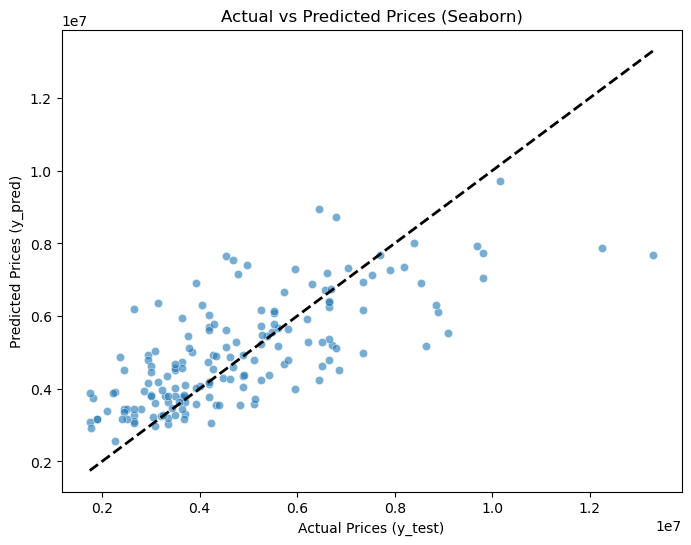

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Add labels and title
plt.xlabel('Actual Prices (y_test)')
plt.ylabel('Predicted Prices (y_pred)')
plt.title('Actual vs Predicted Prices (Seaborn)')
plt.show() #